In [1]:
import os
import sys
import pandas as pd
from os.path import expanduser
        
from  pysd2cat.analysis import od_predictor

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
df1 = pd.read_csv(os.path.join(os.getcwd(), '../resources/tx_od.csv'), index_col=0)
#df1.loc[:, 'inc_time_2'] = df1.apply(lambda x: float(x['inc_time_2'].split(":")[0]), axis=1)
#df1.loc[:, 'inc_time_1'] = df1.apply(lambda x: float(x['inc_time_1'].split(":")[0]), axis=1)
#df1.loc[:, 'inc_temp'] = df1.apply(lambda x: float(x['inc_temp'].split("_")[1]), axis=1)
df1

,SynBioHub URI,Unnamed: 0.1,calibration_id,experiment_id,filename,glycerol_plate_index,glycerol_stock,growth_media_1,growth_media_2,id,inc_temp,inc_time_1,inc_time_2,input,lab,lab_id,media,od,od_cutoff,output,part_1_id,part_2_id,plate_id,post_gfp_raw,post_od_corrected,post_od_raw,post_well,pre_gfp_raw,pre_od_corrected,pre_od_raw,pre_well,replicate,source_container,strain,strain_circuit,well
0,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,0.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_A1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_A1,warm_30,16:hour,16:hour,1,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,38609.608564,3.568378,1.051520,a1,40024.111611,4.556093,1.342577,a3,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,AND,a1
1,https://hub.sd2e.org/user/sd2e/design/UWBF_7300/1,1.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_B1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_B1,warm_30,16:hour,16:hour,0,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,1.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,37298.042023,1.414785,0.416905,b1,39829.311835,4.982175,1.468134,e8,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7300/1,XNOR,b1
2,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,2.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_C1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_C1,warm_30,16:hour,16:hour,1,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000750,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,39886.498815,4.650828,1.370494,c1,40024.111611,4.556093,1.342577,a3,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,AND,c1
3,https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1,3.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_D1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_D1,warm_30,16:hour,16:hour,1,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000750,0.1,1.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,37675.399501,2.494735,0.735142,d1,37890.338105,3.335819,0.982990,d7,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1,XOR,d1
4,https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1,4.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_E1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_E1,warm_30,16:hour,16:hour,11,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,39326.071961,3.918860,1.154799,e1,40845.469102,5.142327,1.515328,b8,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1,XOR,e1
5,https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1,5.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_F1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_F1,warm_30,16:hour,16:hour,10,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,37672.277802,2.659247,0.783620,f1,40162.160129,4.666875,1.375223,c3,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1,AND,f1
6,https://hub.sd2e.org/user/sd2e/design/UWBF_16968/1,6.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_G1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_G1,warm_30,16:hour,16:hour,10,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000750,0.1,1.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,39718.756729,4.994909,1.471887,g1,40516.098534,4.833329,1.424273,a8,0.0,c

In [3]:
#df1.loc[:,'post_od_raw_obs'] = df1['post_od_raw']
targets=[0.05, 0.1, 0.25, 0.5, 1.0]
duration = "12:hour"


dfp = pd.DataFrame({'SynBioHub URI' : df1['SynBioHub URI'].unique()})
dfp.loc[:, 'inc_time_1'] = 18
dfp.loc[:, 'inc_time_2'] = duration
dfp.loc[:, 'growth_media_1'] = 'standard_media'
dfp.loc[:, 'growth_media_2'] = 'standard_media'
dfp.loc[:, 'inc_temp'] = "warm_30"
dfp.loc[:, 'od'] = 0

dfp.loc[:,'key'] = 0 
fdf = pd.DataFrame({'post_od_raw' : targets})
fdf.loc[:,'key'] = 0
dfp = dfp.merge(fdf, how='left', on='key').drop(columns=['key'])

In [4]:
predictions = od_predictor.predict(df1, dfp)

▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 07:43:15
Normalizing training and testing splits...
{'high_osm_media', 'slow_media', 'standard_media'}
{'high_osm_media', 'slow_media', 'standard_media'}
{'standard_media'}
{'slow_media', 'high_osm_media', 'standard_media'}
{'high_osm_media', 'slow_media', 'standard_media'}
{'high_osm_media', 'slow_media', 'standard_media'}
{'standard_media'}
{'slow_media', 'high_osm_media', 'standard_media'}
{'warm_37', 'warm_30'}
{'warm_37', 'warm_30'}
{'warm_30'}
{'warm_37', 'warm_30'}
{'18:hour', '16:hour'}
{'18:hour', '16:hour'}
{18}
{18, '18:hour', '16:hour'}
{'18:hour', '10:hour', '16:hour', '8:hour', '12:hour', '15:hour'}
{'18:hour', '10:hour', '16:hour', '8:hour', '12:hour', '15:hour'}
{'12:hour'}
{'18:hour', '10:hour', '16:hour', '8:hour', '12:hour', '15:hour'}
{'https://hub.sd2e.org/user/sd2e/design/UWBF_7377/1', 'https://hub.sd2e.org/user/sd2e/design/UWBF_8542/1', 'https

Text(0.5, 1.0, '12:hourh Predicted Post OD = 1.0')

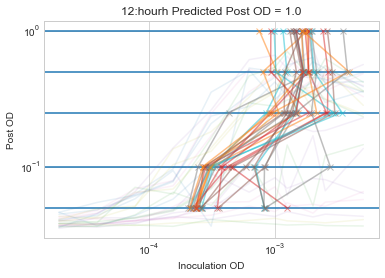

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

strains = df1['SynBioHub URI'].unique()

data=df1.loc[df1['inc_time_2'] == duration]

for target in targets:
    plt.axhline(target)
    
for strain in strains:
    p = data.loc[data['SynBioHub URI'] == strain]
    p = p.sort_values(['od'], ascending=True)
    plt.plot(p['od'], p['post_od_raw'], label=strain,alpha=0.1);


    s = predictions.loc[(predictions['SynBioHub URI'] == strain)  ]
    s = s.sort_values(['post_od_raw'], ascending=True)
    plt.plot(s['od_predictions'], s['post_od_raw'], label=None,  marker='x', alpha=0.5);

    
    
    #plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Inoculation OD")
plt.ylabel("Post OD")
plt.title(str(duration) + "h Predicted Post OD = " + str(target))

